In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering, Birch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import openpyxl
drive.mount('/content/drive')
auction_sales = '/content/drive/My Drive/Borusan/auction_sales.csv'
auction_sales = pd.read_csv(auction_sales)

sql_task = '/content/drive/My Drive/Borusan/SQL_Task.xlsx'
service_df = pd.read_excel(sql_task, sheet_name = 'YuklenecekData')

cohorts_rev = '/content/drive/My Drive/Borusan/Cohorts_rev.csv'
data_set = pd.read_csv(cohorts_rev, sep=";").replace(',','.',regex=True)

auction_sales.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,vehicleid,Brand,Model,Year,N_view,N_offer,Seller_Type,Ask_Price,Sale_Price,Target
0,475312,Renault,Megane,2018,165,11,FILO,680000.0,683000.0,4
1,510780,Renault,Megane,2018,43,1,FILO,660000.0,650000.0,4
2,518623,Renault,Clio,2018,376,5,FILO,635000.0,640500.0,4
3,518745,Renault,Clio,2019,362,14,FILO,625000.0,625000.0,4
4,519030,Renault,Clio,2018,33,6,FILO,625000.0,625000.0,2


In [3]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.7 MB/s eta 0:00:00


2. SORU

In [ ]:
summary_stats = auction_sales.describe()
summary_stats

,vehicleid,Year,N_view,N_offer,Ask_Price,Sale_Price,Target
count,3954.000000,3954.000000,3954.000000,3954.000000,3.871000e+03,3.954000e+03,3954.000000
mean,544667.641376,2020.462064,81.828275,20.144411,8.421627e+05,6.917634e+05,1.646940
std,9827.892499,2.589203,118.055056,36.004618,1.636044e+06,3.590627e+05,0.999763
min,475312.000000,1994.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,537066.500000,2020.000000,33.000000,4.000000,6.432500e+05,5.400000e+05,1.000000
50%,543894.500000,2021.000000,53.000000,9.000000,7.520000e+05,7.157500e+05,1.000000
75%,552848.750000,2022.000000,90.750000,23.000000,9.350000e+05,8.964500e+05,2.000000
max,563197.000000,2023.000000,2233.000000,751.000000,8.350000e+07,1.779000e+06,4.000000


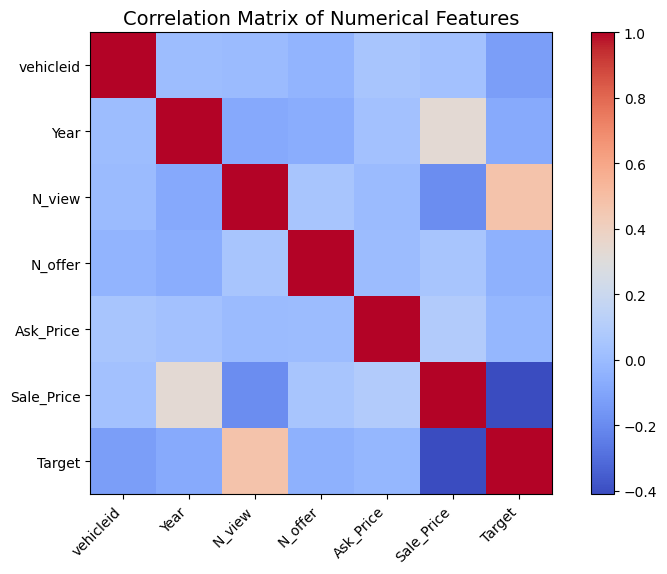

In [ ]:
# Exclude non-numeric columns to compute the correlation matrix
numeric_data = auction_sales.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
correlation_matrix
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

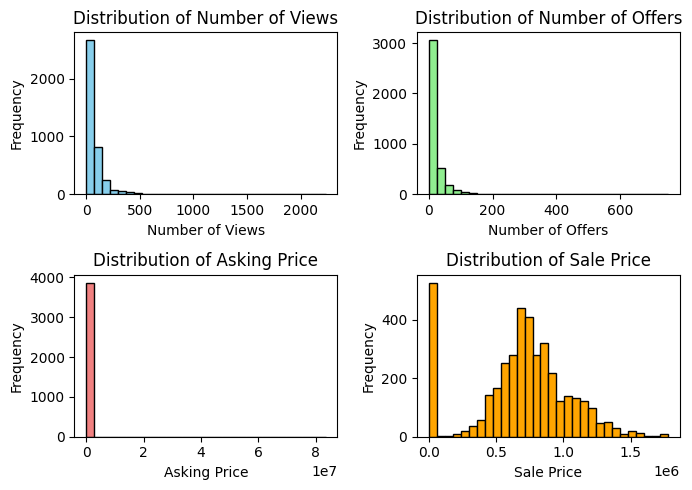

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5))
# N_view distribution
axes[0, 0].hist(auction_sales['N_view'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Number of Views')
axes[0, 0].set_xlabel('Number of Views')
axes[0, 0].set_ylabel('Frequency')

# N_offer distribution
axes[0, 1].hist(auction_sales['N_offer'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Number of Offers')
axes[0, 1].set_xlabel('Number of Offers')
axes[0, 1].set_ylabel('Frequency')

# Ask_Price distribution
axes[1, 0].hist(auction_sales['Ask_Price'], bins=30, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribution of Asking Price')
axes[1, 0].set_xlabel('Asking Price')
axes[1, 0].set_ylabel('Frequency')

# Sale_Price distribution
axes[1, 1].hist(auction_sales['Sale_Price'], bins=30, color='orange', edgecolor='black')
axes[1, 1].set_title('Distribution of Sale Price')
axes[1, 1].set_xlabel('Sale Price')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

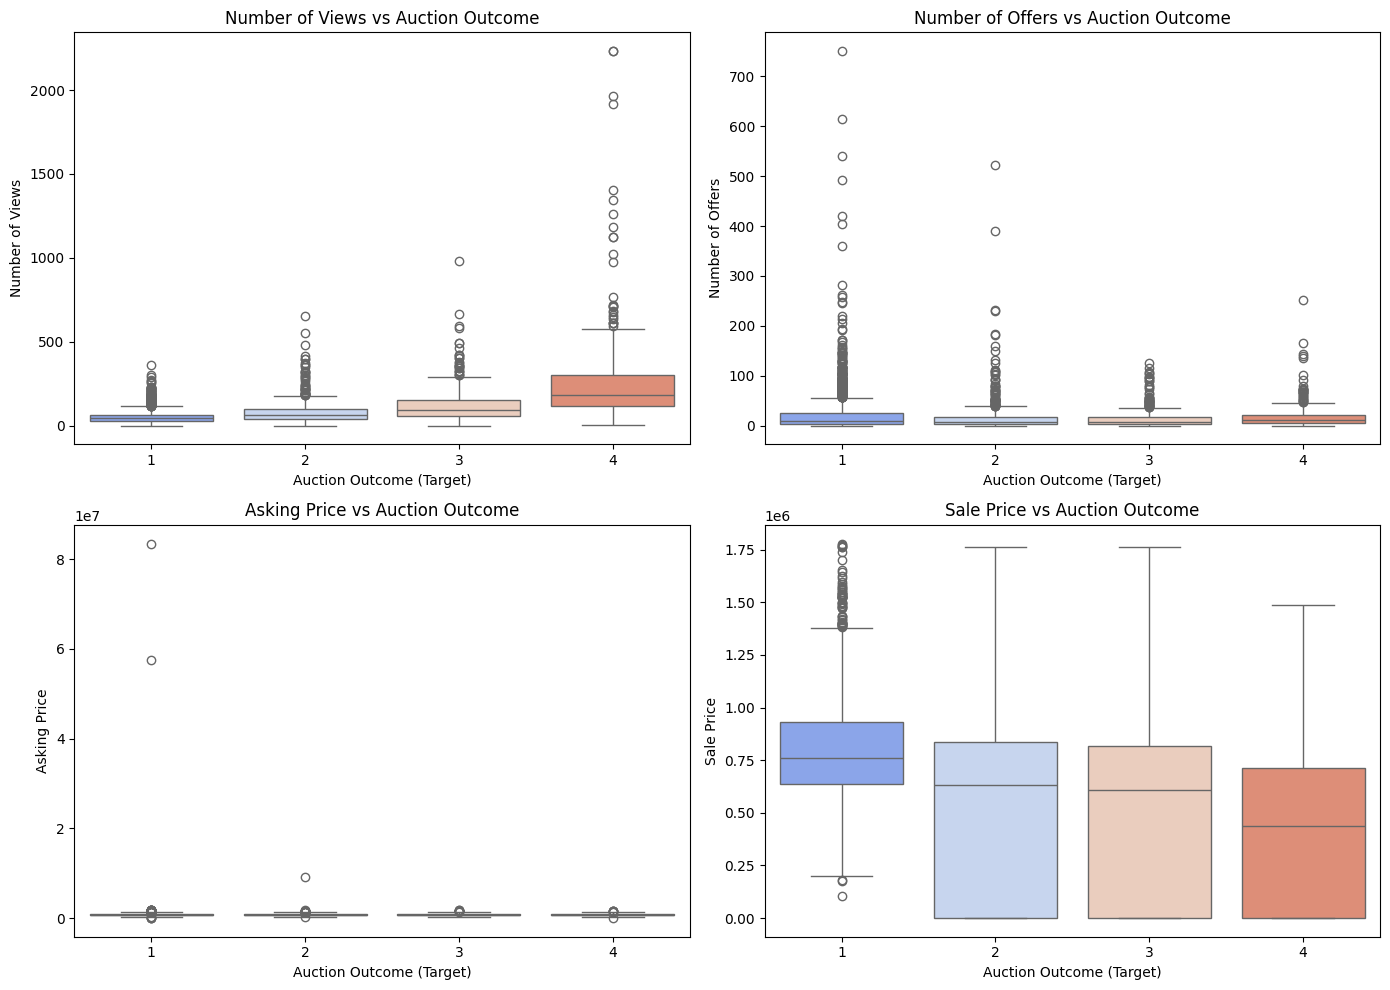

In [ ]:
# Boxplots to explore the relationship between key features and auction outcomes (Target)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# N_view vs Target (auction)
sns.boxplot(x='Target', y='N_view', data=auction_sales, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Number of Views vs Auction Outcome')
axes[0, 0].set_xlabel('Auction Outcome (Target)')
axes[0, 0].set_ylabel('Number of Views')

# N_offer vs Target (auction)
sns.boxplot(x='Target', y='N_offer', data=auction_sales, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Number of Offers vs Auction Outcome')
axes[0, 1].set_xlabel('Auction Outcome (Target)')
axes[0, 1].set_ylabel('Number of Offers')

# Ask_Price vs Target (auction)
sns.boxplot(x='Target', y='Ask_Price', data=auction_sales, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Asking Price vs Auction Outcome')
axes[1, 0].set_xlabel('Auction Outcome (Target)')
axes[1, 0].set_ylabel('Asking Price')

# Sale_Price vs Target (auction)
sns.boxplot(x='Target', y='Sale_Price', data=auction_sales, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Sale Price vs Auction Outcome')
axes[1, 1].set_xlabel('Auction Outcome (Target)')
axes[1, 1].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

In [ ]:
# Check for missing values in the dataset
missing_values = auction_sales.isnull().sum()
missing_values[missing_values > 0]
missing_values

,0
vehicleid,0
Brand,0
Model,0
Year,0
N_view,0
N_offer,0
Seller_Type,0
Ask_Price,83
Sale_Price,0
Target,0


In [ ]:
# Group by 'Brand', 'Model', and 'Year', and fill missing 'Ask_Price' with the mean of same groups
auction_sales['Ask_Price'] = auction_sales.groupby(['Brand', 'Model', 'Year'])['Ask_Price'].transform(lambda x: x.fillna(x.mean()))

missing_values = auction_sales.isnull().sum()
missing_values[missing_values > 0]
missing_values

,0
vehicleid,0
Brand,0
Model,0
Year,0
N_view,0
N_offer,0
Seller_Type,0
Ask_Price,10
Sale_Price,0
Target,0


In [ ]:
# Drop rows where 'Ask_Price' is still missing
auction_sales = auction_sales.dropna(subset=['Ask_Price'])

In [ ]:
# Impute missing values in 'Ask_Price' with the median value
auction_sales['Ask_Price'].fillna(auction_sales['Ask_Price'].median(), inplace=True)
auction_sales

,vehicleid,Brand,Model,Year,N_view,N_offer,Seller_Type,Ask_Price,Sale_Price,Target
0,475312,Renault,Megane,2018,165,11,FILO,680000.0,683000.0,4
1,510780,Renault,Megane,2018,43,1,FILO,660000.0,650000.0,4
2,518623,Renault,Clio,2018,376,5,FILO,635000.0,640500.0,4
3,518745,Renault,Clio,2019,362,14,FILO,625000.0,625000.0,4
4,519030,Renault,Clio,2018,33,6,FILO,625000.0,625000.0,2
...,...,...,...,...,...,...,...,...,...,...
3949,563084,Renault,Clio,2018,11,2,UYE,625000.0,600000.0,1
3950,563116,Citroen,C-Elysee,2014,16,4,RAC,380000.0,322000.0,1
3951,563180,Renault,Megane,2021,59,3,FILO,1080000.0,1080000.0,1
3952,563181,Renault,Megane,2021,57,3,FILO,1095000.0,1093500.0,1


In [ ]:
data_encoded = pd.get_dummies(auction_sales, columns=['Brand', 'Model', 'Seller_Type'], drop_first=True)
data_encoded = data_encoded.astype(int)
data_encoded

,vehicleid,Year,N_view,N_offer,Ask_Price,Sale_Price,Target,Brand_Opel,Brand_Peugeot,Brand_Renault,...,Model_Taliant,Model_Talisman,Model_Trafic,Model_Vivaro,Model_ZOE,Model_e-C4,Seller_Type_RAC,Seller_Type_Satın Alma,Seller_Type_UYE,Seller_Type_YETKILI SATICI
0,475312,2018,165,11,680000,683000,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,510780,2018,43,1,660000,650000,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,518623,2018,376,5,635000,640500,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,518745,2019,362,14,625000,625000,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,519030,2018,33,6,625000,625000,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,563084,2018,11,2,625000,600000,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3950,563116,2014,16,4,380000,322000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3951,563180,2021,59,3,1080000,1080000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3952,563181,2021,57,3,1095000,1093500,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_encoded = data_encoded.drop(columns=['vehicleid'])
data_encoded

,Year,N_view,N_offer,Ask_Price,Sale_Price,Target,Brand_Opel,Brand_Peugeot,Brand_Renault,Model_206,...,Model_Taliant,Model_Talisman,Model_Trafic,Model_Vivaro,Model_ZOE,Model_e-C4,Seller_Type_RAC,Seller_Type_Satın Alma,Seller_Type_UYE,Seller_Type_YETKILI SATICI
0,2018,165,11,680000,683000,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,43,1,660000,650000,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,376,5,635000,640500,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,362,14,625000,625000,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,33,6,625000,625000,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,2018,11,2,625000,600000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3950,2014,16,4,380000,322000,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3951,2021,59,3,1080000,1080000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3952,2021,57,3,1095000,1093500,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = data_encoded['Target']
X = data_encoded.drop(columns=['Target'])

In [ ]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a RandomForest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Generating a classification report to evaluate model performance
report = classification_report(y_test, y_pred, target_names=['Auction 1', 'Auction 2', 'Auction 3', 'Auction 4'])
print(report)

              precision    recall  f1-score   support

   Auction 1       0.78      0.97      0.87       495
   Auction 2       0.50      0.22      0.31       125
   Auction 3       0.29      0.16      0.21        87
   Auction 4       0.63      0.55      0.59        82

    accuracy                           0.72       789
   macro avg       0.55      0.48      0.49       789
weighted avg       0.67      0.72      0.68       789



In [ ]:
# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    #'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    #'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(max_iter=500, random_state=42)
}

# Loop over the classifiers and evaluate them
for name, clf in classifiers.items():
    print(f"Training {name}...")

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 60)

  #XGBoost
  #LightGBM

Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.70595690747782
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.99      0.85       495
           2       0.46      0.22      0.29       125
           3       0.20      0.01      0.02        87
           4       0.63      0.49      0.55        82

    accuracy                           0.71       789
   macro avg       0.51      0.43      0.43       789
weighted avg       0.62      0.71      0.64       789

Confusion Matrix:
 [[489   2   2   2]
 [ 89  27   1   8]
 [ 60  13   1  13]
 [ 24  17   1  40]]
------------------------------------------------------------
Training K-Nearest Neighbors...

K-Nearest Neighbors Results:
Accuracy: 0.6539923954372624
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.95      0.83       495
           2       0.30      0.19      0.23       125
           3     

In [6]:
model_results = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Gradient Boosting',
              'Random Forest', 'AdaBoost', 'Neural Network'],
    'Accuracy': [0.70595690747782, 0.6539923954372624, 0.6451204055766794,
                 0.7275031685678074, 0.7186311787072244, 0.6945500633713562,
                 0.6653992395437263]
}
df_model_results = pd.DataFrame(model_results)
df_model_results

,Model,Accuracy
0,Logistic Regression,0.705957
1,K-Nearest Neighbors,0.653992
2,Decision Tree,0.645120
3,Gradient Boosting,0.727503
4,Random Forest,0.718631
5,AdaBoost,0.694550
6,Neural Network,0.665399


1. SORU

In [8]:
service_df['Service_Bill_Date'] = pd.to_datetime(service_df['Service_Bill_Date'])

last_service = service_df.groupby(['CustomerNo', 'VehicleNo']).agg({'Service_Bill_Date': 'max'}).reset_index()
last_service.rename(columns={'Service_Bill_Date': 'LastServiceDate'}, inplace=True)

last_service['LastServiceDate'] = pd.to_datetime(last_service['LastServiceDate'])

three_month_services = service_df.merge(last_service, on=['CustomerNo', 'VehicleNo'], how='inner')


three_month_services['Service_Bill_Date'] = pd.to_datetime(three_month_services['Service_Bill_Date'])

three_month_services = three_month_services[
    (three_month_services['Service_Bill_Date'] < three_month_services['LastServiceDate']) &
    (three_month_services['Service_Bill_Date'] >= three_month_services['LastServiceDate'] - pd.DateOffset(months=3))
]
three_month_services = three_month_services[['CustomerNo', 'VehicleNo', 'Service_Bill_Amt_EUR']]

last_service_bill = service_df.merge(last_service, on=['CustomerNo', 'VehicleNo'], how='inner')
last_service_bill = last_service_bill[last_service_bill['Service_Bill_Date'] == last_service_bill['LastServiceDate']]
last_service_bill = last_service_bill[['CustomerNo', 'VehicleNo', 'Service_Bill_Amt_EUR']]
last_service_bill.rename(columns={'Service_Bill_Amt_EUR': 'Last_Service_Bill_Amt'}, inplace=True)

final_df = service_df.merge(last_service, on=['CustomerNo', 'VehicleNo'], how='inner')\
    .merge(last_service_bill, on=['CustomerNo', 'VehicleNo'], how='inner')\
    .merge(three_month_services, on=['CustomerNo', 'VehicleNo'], how='left', suffixes=('', '_inLast3M'))

final_agg = final_df.groupby(['CustomerNo', 'VehicleNo', 'Last_Service_Bill_Amt']).agg({
    'Service_Bill_Amt_EUR': 'mean',
    'Service_Bill_Amt_EUR_inLast3M': 'mean'
}).reset_index()

final_agg.rename(columns={
    'Service_Bill_Amt_EUR': 'Avg_Bill_Amt',
    'Service_Bill_Amt_EUR_inLast3M': 'Avg_Bill_Amt_inLast3M'
}, inplace=True)

final_agg

,CustomerNo,VehicleNo,Last_Service_Bill_Amt,Avg_Bill_Amt,Avg_Bill_Amt_inLast3M
0,1,100,46.493493,203.661384,16.209484
1,1,200,5.403161,35.663059,107.712521
2,1,200,25.251286,35.663059,107.712521
3,2,300,4.945821,17.364388,NaN
4,2,300,14.837462,17.364388,NaN
5,2,400,19.754190,31.833566,NaN
6,2,400,54.404029,31.833566,NaN
7,2,400,78.327479,31.833566,NaN


3. SORU

In [40]:
data_set

,Date,Cohort 1 Rev,Cohort 2 Rev,Cohort 3 Rev,Cohort 4 Rev
0,Jan-23,5.381984457,NaN,NaN,NaN
1,Feb-23,4.264968815,4.975796951,NaN,NaN
2,March-24,2.132484407,4.264968815,5.991265716,NaN
3,Apr-23,2.234031284,3.858781309,4.264968815,5.057034452
4,May.23,1.929390654,2.234031284,3.046406296,4.264968815
5,Jun-23,1.827843778,1.919235967,1.523203148,3.554140679
6,Jul-23,1.726296901,1.015468765,1.015468765,2.132484407
7,Aug-23,0.812375012,0.863148451,3.757234432,1.523203148
8,Sep-23,0.99515939,0.767694387,0.913921889,0.913921889
9,Oct-23,0.548353133,0.660054698,0.507734383,0.762820137


In [41]:
del data_set[data_set.columns[0]]
np_set = data_set.to_numpy()
data_set

,Cohort 1 Rev,Cohort 2 Rev,Cohort 3 Rev,Cohort 4 Rev
0,5.381984457,NaN,NaN,NaN
1,4.264968815,4.975796951,NaN,NaN
2,2.132484407,4.264968815,5.991265716,NaN
3,2.234031284,3.858781309,4.264968815,5.057034452
4,1.929390654,2.234031284,3.046406296,4.264968815
5,1.827843778,1.919235967,1.523203148,3.554140679
6,1.726296901,1.015468765,1.015468765,2.132484407
7,0.812375012,0.863148451,3.757234432,1.523203148
8,0.99515939,0.767694387,0.913921889,0.913921889
9,0.548353133,0.660054698,0.507734383,0.762820137


In [42]:
def train_test_split(a):
    return a[:a.shape[0]-4],a[a.shape[0]-4:];

def heuristic_preprocess(x,func_list):
    for z in func_list:
            x = z(x)
    return x;

def mean_shift_normalize(data,shift =10):
    d_mean = np.mean(data)
    d_std = np.std(data)
    x = data - d_mean
    x = x/d_std
    x = x + shift

    return x,d_mean,d_std

In [43]:
window_size = 3;
f1 = lambda x : x.astype(float)
f2 = lambda x: x[~np.isnan(x)]

c1 = heuristic_preprocess(np.array(np_set[:,1]),[f1,f2])
c2 = heuristic_preprocess(np.array(np_set[:,2]),[f1,f2])
c3 = heuristic_preprocess(np.array(np_set[:,3]),[f1,f2])

c1,m1,s1 = mean_shift_normalize(c1)
c2,m2,s2 = mean_shift_normalize(c2)
c3,m3,s3 = mean_shift_normalize(c3)

min_array_length = min(len(c1),len(c2),len(c3))

data_x = []
data_y = [];
for q in range(min_array_length-window_size):
    data_x.append(np.concatenate((c1[q:q+window_size],c2[q:q+window_size],c3[q:q+window_size])))
    data_y.append([c1[q+window_size],c2[q+window_size],c3[q+window_size]])

In [44]:
model = MLPRegressor(solver='adam', alpha=1e-5,validation_fraction=0, max_iter=500, hidden_layer_sizes=(100,100, 3), shuffle=False,learning_rate_init=0.001)

In [45]:
model.fit(data_x[:-3],data_y[:-3])

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(100, 100, 3), max_iter=500,
             shuffle=False, validation_fraction=0)

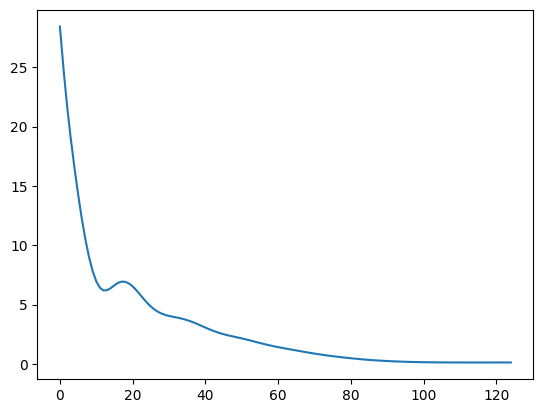

In [46]:
loss_values = model.loss_curve_
plt.plot(loss_values)
plt.show()

In [47]:
def auto_regress(samples,window_size=3,limit=12):
    predictions = [];
    for t in range(limit):
        next_val =  model.predict([samples])[0];
        predictions.append(next_val)

        samples = np.concatenate([samples[3:],next_val])
    return predictions;

In [48]:
predictions = auto_regress(data_x[-1])

In [49]:
((np.array(predictions)-10)*[s1,s2,s3])+[m1,m1,m3]

array([[-0.30842135, -0.63510638, -0.79714729],
       [-0.65655264, -1.07170333, -1.15433526],
       [-1.07698381, -1.60574853, -1.71438078],
       [-1.47064823, -2.103446  , -2.19418616],
       [-1.85453554, -2.58841931, -2.65517616],
       [-2.24271781, -3.07888061, -3.12250259],
       [-2.61576108, -3.55018736, -3.5710966 ],
       [-2.98415382, -4.0156106 , -4.01394647],
       [-3.34577361, -4.47245862, -4.44830603],
       [-3.69948684, -4.91933068, -4.87340981],
       [-4.04687201, -5.35819837, -5.29072458],
       [-4.38701085, -5.7878634 , -5.69842227]])

In [50]:
loss_values

[28.44924093174426,
 24.857911448649933,
 21.681150240645042,
 18.968551720564754,
 16.546224061198743,
 14.310018768372549,
 12.294823160488136,
 10.51434512290631,
 9.016738159175915,
 7.82716561916528,
 6.957189194025532,
 6.417575368608746,
 6.186067410453609,
 6.207266736889671,
 6.387346643680138,
 6.625917707514627,
 6.8301102295519485,
 6.933878678916813,
 6.915818405457405,
 6.772273911629438,
 6.53393904096581,
 6.2172370758574855,
 5.8573019176973204,
 5.488993081637801,
 5.141267051253819,
 4.83464658009951,
 4.5804402357476794,
 4.381830211216838,
 4.231595273333245,
 4.120958613983932,
 4.038746612538741,
 3.972990823638977,
 3.912544954787523,
 3.848135208325352,
 3.773119395958258,
 3.6837079020627645,
 3.5789111098867386,
 3.460120772739335,
 3.330650609267029,
 3.1950672217619602,
 3.0584176525426314,
 2.9256436263755212,
 2.8011276318320584,
 2.6877692069762054,
 2.586807962797787,
 2.497880231084747,
 2.419157133156522,
 2.347715231253449,
 2.280513578777356,
 2.213

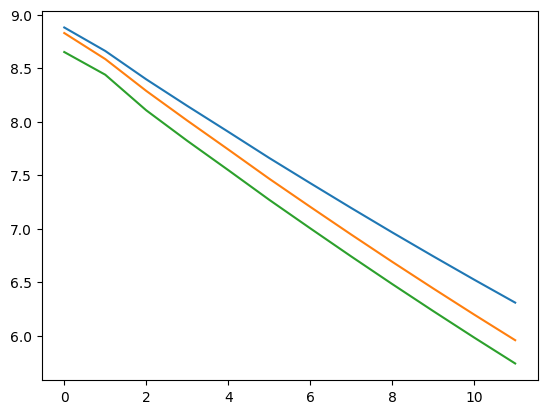

In [51]:
plt.plot(predictions)

In [52]:
np_set[:,0]

array(['5.381984457', '4.264968815', '2.132484407', '2.234031284',
       '1.929390654', '1.827843778', '1.726296901', '0.812375012',
       '0.99515939', '0.548353133', '0.406187506', '0.233557816',
       '0.111701564', '0.096103964', '0.031805802', '0.000532766'],
      dtype=object)